In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "./data/ES_BIDS/"
df = pd.read_parquet(data_path + "CAISO_ES_BIDS.parquet")

In [3]:
bid_cols = [col for col in df.columns if "bid" in col]
df = df.fillna(0)

In [4]:
y_1_date_range = [pd.Timestamp("2022-07-01"), pd.Timestamp("2023-07-01")]
y_2_date_range = [pd.Timestamp("2023-07-01"), pd.Timestamp("2024-07-01")]

y_1_df = df.loc[(df.index >= y_1_date_range[0]) & (df.index < y_1_date_range[1])]
y_2_df = df.loc[(df.index >= y_2_date_range[0]) & (df.index < y_2_date_range[1])]

In [5]:
# plot the capacity-normalized bids for every segment aggregated daily
bid_columns = [col for col in df.columns if "bid" in col]

# aggregate daily capacities (time-based average) from df
df_daily_aggregate = df[bid_columns].resample("D").mean()
df_daily_aggregate["bid_rtpd_neg_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "rtpd_neg" in col_name]
)
df_daily_aggregate["bid_rtpd_pos_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "rtpd_pos" in col_name]
)
df_daily_aggregate["bid_ifm_neg_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "ifm_neg" in col_name]
)
df_daily_aggregate["bid_ifm_pos_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "ifm_pos" in col_name]
)

# further, look at quarter-on-quarter changes (seasonally? calendar year? who knows...)

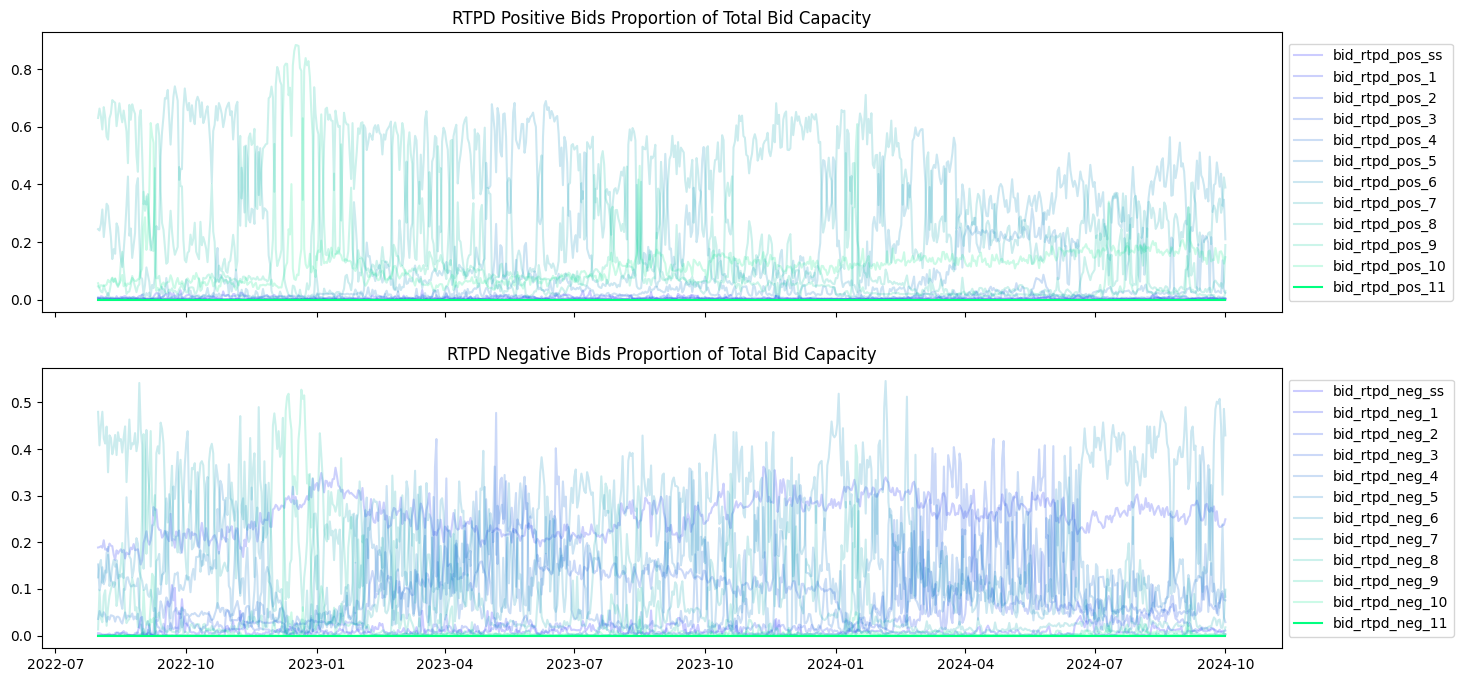

In [6]:
# plot rtpd
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# set interest segment... all other segments have lower opacities
interest_segment = "11"

# Get the colormap
cmap = plt.get_cmap("winter")
colors = cmap(np.linspace(0, 1, len([col for col in bid_columns if "rtpd_pos" in col])))

# Plot rtpd_pos_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "rtpd_pos" in col]):
    if interest_segment in col:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[0].set_title("RTPD Positive Bids Proportion of Total Bid Capacity")

# Plot rtpd_neg_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "rtpd_neg" in col]):
    if interest_segment in col:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_neg_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_neg_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[1].set_title("RTPD Negative Bids Proportion of Total Bid Capacity")

# Move the legend off the right side of the plot
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

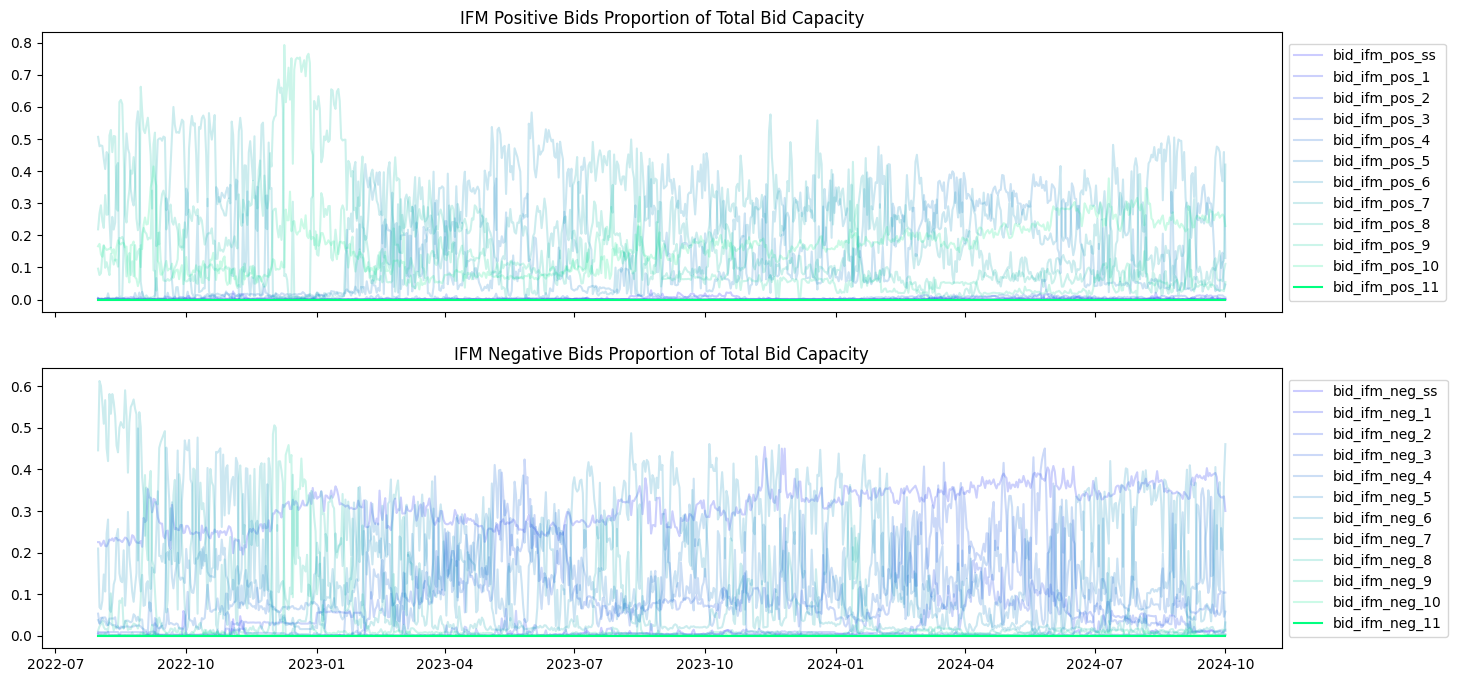

In [7]:
# plot ifm
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Plot ifm_pos_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "ifm_pos" in col]):
    if interest_segment in col:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_pos_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_pos_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[0].set_title("IFM Positive Bids Proportion of Total Bid Capacity")

# Plot ifm_neg_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "ifm_neg" in col]):
    if interest_segment in col:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_neg_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_neg_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[1].set_title("IFM Negative Bids Proportion of Total Bid Capacity")

# Move the legend off the right side of the plot
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

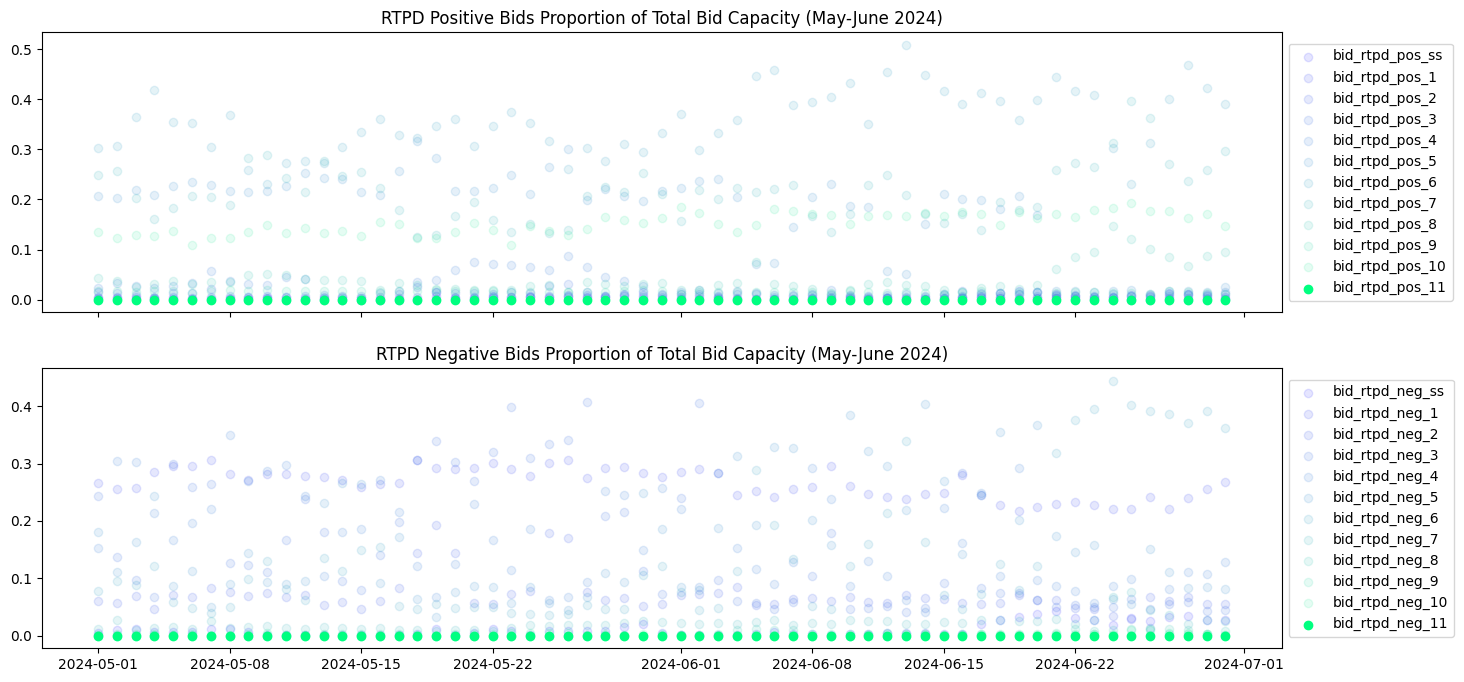

In [8]:
# plot rtpd for May-June 2024
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Filter the dataframe for May-June 2024
df_may_june_2024 = df.loc[(df.index >= "2024-05-01") & (df.index < "2024-07-01")]

# Aggregate daily capacities (time-based average) from df_may_june_2024
df_may_june_2024 = df_may_june_2024[bid_columns].resample("D").mean()
df_may_june_2024["bid_rtpd_neg_tot"] = sum(
    [df_may_june_2024[col_name] for col_name in bid_columns if "rtpd_neg" in col_name]
)
df_may_june_2024["bid_rtpd_pos_tot"] = sum(
    [df_may_june_2024[col_name] for col_name in bid_columns if "rtpd_pos" in col_name]
)

# Plot rtpd_pos_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "rtpd_pos" in col]):
    if interest_segment not in col:
        axs[0].scatter(
            df_may_june_2024.index,
            df_may_june_2024[col] / df_may_june_2024["bid_rtpd_pos_tot"],
            label=col,
            color=colors[i],
            alpha=0.1,
        )
# Plot the interest segment last
for i, col in enumerate([col for col in bid_columns if "rtpd_pos" in col]):
    if interest_segment in col:
        axs[0].scatter(
            df_may_june_2024.index,
            df_may_june_2024[col] / df_may_june_2024["bid_rtpd_pos_tot"],
            label=col,
            color=colors[i],
        )
axs[0].set_title("RTPD Positive Bids Proportion of Total Bid Capacity (May-June 2024)")

# Plot rtpd_neg_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "rtpd_neg" in col]):
    if interest_segment not in col:
        axs[1].scatter(
            df_may_june_2024.index,
            df_may_june_2024[col] / df_may_june_2024["bid_rtpd_neg_tot"],
            label=col,
            color=colors[i],
            alpha=0.1,
        )
# Plot the interest segment last
for i, col in enumerate([col for col in bid_columns if "rtpd_neg" in col]):
    if interest_segment in col:
        axs[1].scatter(
            df_may_june_2024.index,
            df_may_june_2024[col] / df_may_june_2024["bid_rtpd_neg_tot"],
            label=col,
            color=colors[i],
        )
axs[1].set_title("RTPD Negative Bids Proportion of Total Bid Capacity (May-June 2024)")

# Move the legend off the right side of the plot
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()